In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('vectorized_data.zip')

In [3]:
df.shape

(176141, 53)

In [4]:
df['Assessment reports Score'].value_counts()

3    91941
4    61151
2    21104
1     1451
5      494
Name: Assessment reports Score, dtype: int64

## Random sampling for grade class imbalance

In [5]:
sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [6]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

In [7]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
columns = X.columns
y = df['Assessment reports Score']

In [8]:
# Apply feature scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns= columns)
X.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.597048,1.690326,-1.723618,-2.090887,0.0,-0.857059,0.990267,0.103213,-1.717711,0.698453,...,1.450289,0.984138,-0.086198,0.272528,2.479325,0.377564,1.024740,0.595381,0.701968,-0.735578
1,-1.597048,0.808200,-1.264910,-1.759362,0.0,-0.950578,0.771673,-0.287318,-1.459053,-0.151625,...,1.188954,0.952091,1.272911,0.074446,1.360929,-0.711465,1.061060,2.136829,1.546927,1.233251
2,-1.597048,1.619423,-2.042719,-1.711717,0.0,-1.761074,-0.080844,-0.606843,-1.782375,0.628001,...,1.006513,-0.316934,-0.031583,-0.672400,0.616730,-1.735362,-0.013959,-0.427382,1.541996,0.048410
3,-1.597048,2.289881,-2.202270,-1.951924,0.0,-1.745488,-0.805327,-1.879027,-1.653046,0.773732,...,0.483031,0.344786,-0.497149,-1.384633,-0.617137,-2.130191,0.528913,-1.653644,0.650794,-0.618310
4,-1.596826,1.107977,-0.866033,-0.991096,0.0,-0.545329,-0.258842,0.316229,-0.747746,0.243392,...,0.402120,0.002382,-0.978569,-0.598080,0.613585,-0.497932,1.008204,1.905735,0.615524,-0.753498


In [9]:
len(X.columns)

40

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [11]:
classifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [12]:
classifier.fit(X_train, y_train)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:11:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [13]:
feature_tables = pd.DataFrame(classifier.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables.sort_values(by=0, ascending=False)

,0
automated_readability_index,0.204819
unique_words,0.130166
linsear_write_formula,0.085506
rttr,0.061028
words_count,0.055611
gunning_fog,0.037681
time_stamp,0.031803
coleman_liau_index,0.025707
ttr,0.023018
flesch_kincaid_grade,0.017934


In [14]:
y_pred = classifier.predict(X_test)

In [15]:
mean_squared_error(y_test, y_pred)

0.955205964114228

In [16]:
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({3: 4399, 4: 6012, 2: 5417})

In [17]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.79%


In [18]:
train_score = classification_report(y_test, y_pred)
print(train_score)

              precision    recall  f1-score   support

           2       0.52      0.53      0.52      5344
           3       0.42      0.35      0.38      5236
           4       0.48      0.55      0.52      5248

    accuracy                           0.48     15828
   macro avg       0.47      0.48      0.47     15828
weighted avg       0.47      0.48      0.47     15828



In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

-0.42747650693482075

## Cross validation

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:12:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:12:09] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:12:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:12:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:12:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.477
Fold 2: 0.480
Fold 3: 0.480
Fold 4: 0.479
Fold 5: 0.475
Overall Accuracy: 0.478 (+/- 0.004)


## PCA

### Apply feature scaling 

In [22]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [23]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.597048,1.690326,-1.723618,-2.090887,0.0,-0.857059,0.990267,0.103213,-1.717711,0.698453,...,1.450289,0.984138,-0.086198,0.272528,2.479325,0.377564,1.024740,0.595381,0.701968,-0.735578
1,-1.597048,0.808200,-1.264910,-1.759362,0.0,-0.950578,0.771673,-0.287318,-1.459053,-0.151625,...,1.188954,0.952091,1.272911,0.074446,1.360929,-0.711465,1.061060,2.136829,1.546927,1.233251
2,-1.597048,1.619423,-2.042719,-1.711717,0.0,-1.761074,-0.080844,-0.606843,-1.782375,0.628001,...,1.006513,-0.316934,-0.031583,-0.672400,0.616730,-1.735362,-0.013959,-0.427382,1.541996,0.048410
3,-1.597048,2.289881,-2.202270,-1.951924,0.0,-1.745488,-0.805327,-1.879027,-1.653046,0.773732,...,0.483031,0.344786,-0.497149,-1.384633,-0.617137,-2.130191,0.528913,-1.653644,0.650794,-0.618310
4,-1.596826,1.107977,-0.866033,-0.991096,0.0,-0.545329,-0.258842,0.316229,-0.747746,0.243392,...,0.402120,0.002382,-0.978569,-0.598080,0.613585,-0.497932,1.008204,1.905735,0.615524,-0.753498


Text(0.5, 1.0, 'PCA cumulative explained variance')

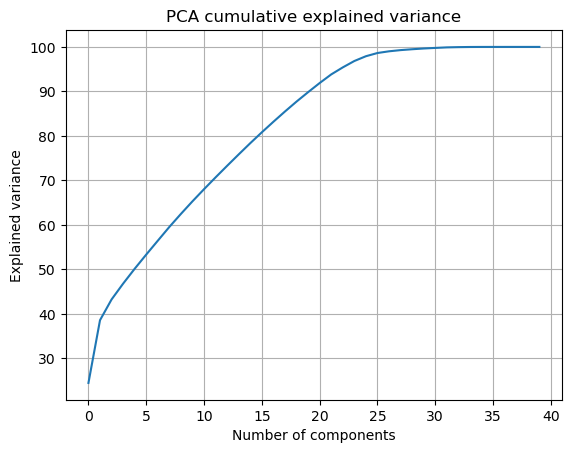

In [24]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [25]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.507863
2,38.600873
3,43.262968
4,46.820894
5,50.163124
6,53.351302
7,56.466048
8,59.562147
9,62.488698
10,65.320463


In [26]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [27]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2451,-0.0269,0.2264,-0.2409,-0.2388,-0.0000,-0.2496,-0.1723,-0.1941,-0.2260,...,0.0282,-0.0319,0.0052,0.0338,-0.0044,-0.0397,0.0385,0.0449,-0.0944,0.0215
Dimension 2,0.1409,0.1107,-0.1859,0.2678,0.2576,-0.0000,0.2506,-0.0041,-0.0855,0.2839,...,-0.0193,-0.0194,-0.0135,0.0122,-0.0116,0.0242,-0.0232,0.0067,-0.0175,0.0075
Dimension 3,0.0466,-0.0390,-0.3202,0.0832,0.0095,0.0000,0.0545,0.4615,0.3394,-0.0167,...,-0.1017,0.3531,0.0038,0.1172,0.0742,0.0665,-0.1550,-0.0984,0.0136,-0.2056
Dimension 4,0.0356,-0.0107,-0.0156,-0.0034,-0.0030,0.0000,0.0080,0.0653,-0.0311,0.0013,...,0.2173,0.1587,-0.3792,-0.2779,0.0687,-0.2500,0.1009,-0.1560,0.2178,-0.0552
Dimension 5,0.0334,0.0827,0.0092,-0.0149,-0.0178,0.0000,-0.0112,0.0070,0.0429,-0.0210,...,-0.0582,0.1450,-0.0309,-0.0704,0.0176,0.3756,-0.2521,0.1156,0.3367,-0.0921
Dimension 6,0.0319,-0.3622,0.0339,-0.0127,-0.0010,-0.0000,0.0231,0.0407,-0.1041,0.0076,...,0.1287,0.1293,-0.1141,-0.1620,0.0205,-0.3518,-0.0083,-0.4449,-0.0659,0.0538
Dimension 7,0.0311,0.0039,0.0283,-0.0354,-0.0400,0.0000,0.0015,0.0817,-0.0756,-0.0331,...,0.1807,0.1061,0.0043,-0.1624,0.6228,0.0554,0.1468,0.0235,0.3354,0.1485
Dimension 8,0.0310,0.0866,0.0144,-0.0018,-0.0056,-0.0000,0.0022,-0.0180,0.0954,-0.0047,...,-0.2299,0.2195,0.3260,-0.1240,-0.2499,0.0008,0.1643,-0.2912,-0.1208,0.1378
Dimension 9,0.0293,-0.1677,0.0069,-0.0060,-0.0137,-0.0000,-0.0014,0.0062,0.0033,-0.0065,...,-0.2378,0.2060,0.1149,-0.1300,0.1015,-0.1729,-0.0019,0.3064,0.0964,0.3262
Dimension 10,0.0283,0.1542,0.0647,0.0032,0.0426,-0.0000,-0.0183,-0.1909,0.0462,0.0368,...,-0.2924,-0.2719,-0.0455,0.1176,0.4665,-0.2440,-0.1931,-0.0695,-0.0607,-0.4662


In [28]:
pca_results_40.iloc[0]

Explained Variance              0.2451
time_stamp                     -0.0269
flesch_reading_ease             0.2264
flesch_kincaid_grade           -0.2409
gunning_fog                    -0.2388
smog_index                     -0.0000
automated_readability_index    -0.2496
coleman_liau_index             -0.1723
dale_chall_readability_score   -0.1941
linsear_write_formula          -0.2260
hdd                            -0.2630
Summer                         -0.2262
Dugast                         -0.1540
words_count                    -0.1924
unique_words                   -0.2734
ttr                            -0.1315
rttr                           -0.3059
cttr                           -0.3059
mtld                           -0.2403
herdan                         -0.2000
maas                            0.2407
vec_1                           0.0440
vec_2                           0.0035
vec_3                           0.0257
vec_4                          -0.0312
vec_5                    

In [29]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [30]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(63312, 25)
[0.24507863 0.38600873 0.43262968 0.46820894 0.50163124 0.53351302
 0.56466048 0.59562147 0.62488698 0.65320463 0.68044992 0.7070209
 0.73302378 0.75863516 0.78383848 0.80822939 0.83192226 0.85497238
 0.87724482 0.89837531 0.91890369 0.93828094 0.95404036 0.96837414
 0.97910612]


Text(0.5, 1.0, 'PCA cumulative explained variance')

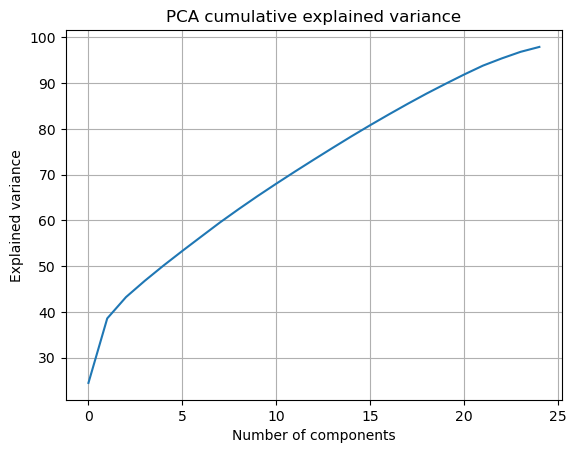

In [31]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [32]:
pca_features_25

array([[ 0.28177216, -5.34337153,  0.11866977, ..., -0.14190902,
         0.02837232, -0.29464636],
       [ 3.18871213, -2.66626804,  1.04203233, ..., -0.97567877,
         0.14498334, -0.04118888],
       [ 1.87364241, -5.47279713, -0.15568256, ...,  0.39062623,
        -0.19587108,  0.03139511],
       ...,
       [-1.66270868,  2.43451926,  0.45581024, ...,  0.05849982,
         0.18271821,  0.06863852],
       [-2.96986064,  1.10489166, -1.1878988 , ...,  0.04626065,
         0.11000596,  1.2946333 ],
       [-0.05829332,  2.39413729,  2.54657803, ..., -0.04788332,
        -0.50862413,  0.11058851]])

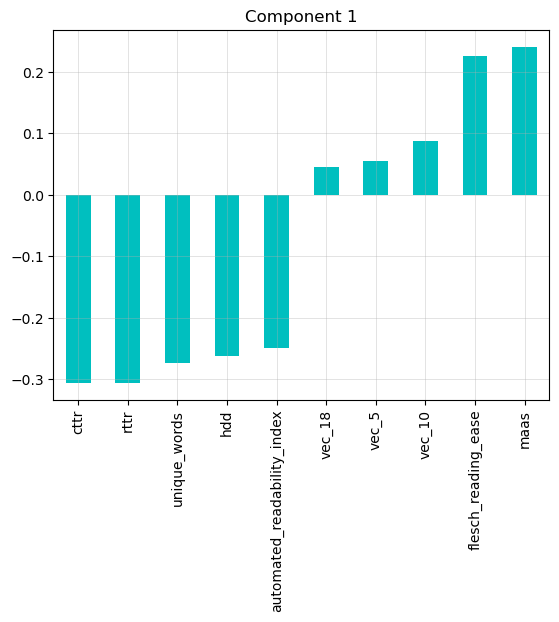

Accumulative explained varaince for Component 1 is 0.2451


cttr                          -0.3059
rttr                          -0.3059
unique_words                  -0.2734
hdd                           -0.2630
automated_readability_index   -0.2496
vec_18                         0.0449
vec_5                          0.0554
vec_10                         0.0878
flesch_reading_ease            0.2264
maas                           0.2407
Name: Dimension 1, dtype: float64

In [33]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

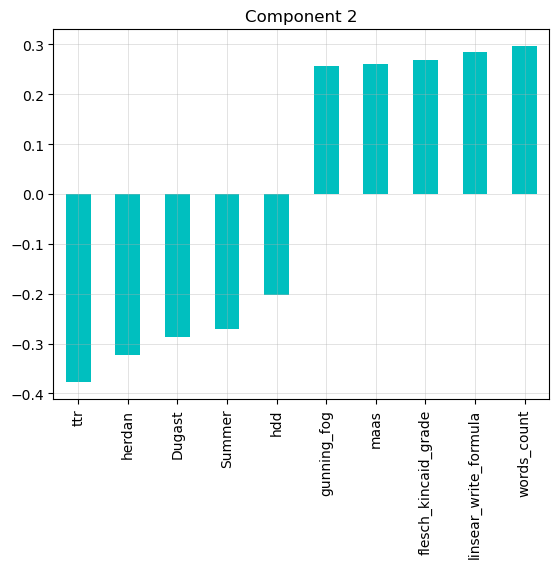

Accumulative explained varaince for Component 2 is 0.386


ttr                     -0.3774
herdan                  -0.3238
Dugast                  -0.2870
Summer                  -0.2714
hdd                     -0.2016
gunning_fog              0.2576
maas                     0.2605
flesch_kincaid_grade     0.2678
linsear_write_formula    0.2839
words_count              0.2964
Name: Dimension 2, dtype: float64

In [34]:
pca_plot(pca_results_25, 2)

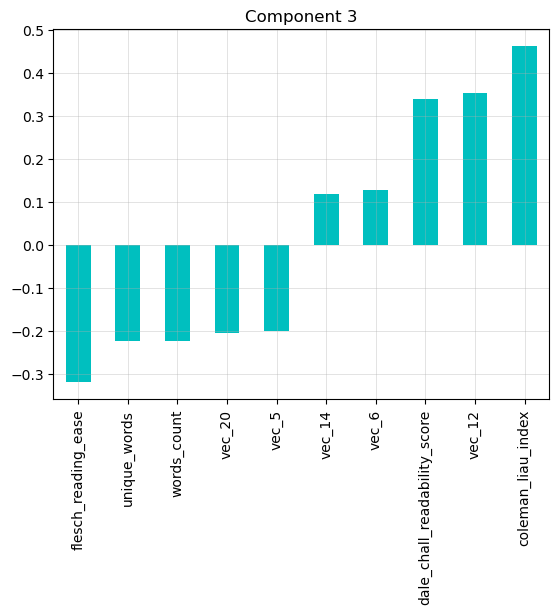

Accumulative explained varaince for Component 3 is 0.4326


flesch_reading_ease            -0.3202
unique_words                   -0.2248
words_count                    -0.2247
vec_20                         -0.2056
vec_5                          -0.2021
vec_14                          0.1172
vec_6                           0.1280
dale_chall_readability_score    0.3394
vec_12                          0.3531
coleman_liau_index              0.4615
Name: Dimension 3, dtype: float64

In [35]:
pca_plot(pca_results_25, 3)

In [36]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [37]:
classifier_pca = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

classifier_pca.fit(X_train_pca, Y_train_pca)

[10:12:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
y_pred_pca = classifier_pca.predict(X_test_pca)

counter = collections.Counter(y_pred_pca)
counter

Counter({4: 4806, 3: 3563, 2: 4294})

In [39]:
# predictions_pca = [round(value) for value in y_pred_pca]

In [40]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, y_pred_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.14%


In [41]:
train_score = classification_report(Y_test_pca, y_pred_pca)
print(train_score)

              precision    recall  f1-score   support

           2       0.49      0.50      0.50      4212
           3       0.40      0.34      0.37      4197
           4       0.45      0.51      0.48      4254

    accuracy                           0.45     12663
   macro avg       0.45      0.45      0.45     12663
weighted avg       0.45      0.45      0.45     12663



In [42]:
mean_squared_error(Y_test_pca, y_pred_pca)

1.0326147042564953

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_pca, y_pred_pca)
r2

-0.5445564802854661

## Cross validation

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier_pca, pca_features_25, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:12:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:07] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:14] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:21] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.455
Fold 2: 0.454
Fold 3: 0.453
Fold 4: 0.456
Fold 5: 0.458
Overall Accuracy: 0.455 (+/- 0.003)


In [46]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2451,-0.0269,0.2264,-0.2409,-0.2388,-0.0,-0.2496,-0.1723,-0.1941,-0.2260,...,0.0282,-0.0319,0.0052,0.0338,-0.0044,-0.0397,0.0385,0.0449,-0.0944,0.0215
Dimension 2,0.1409,0.1107,-0.1859,0.2678,0.2576,0.0,0.2506,-0.0041,-0.0855,0.2839,...,-0.0193,-0.0194,-0.0135,0.0122,-0.0116,0.0242,-0.0232,0.0067,-0.0175,0.0075
Dimension 3,0.0466,-0.0390,-0.3202,0.0832,0.0095,0.0,0.0545,0.4615,0.3394,-0.0167,...,-0.1017,0.3531,0.0038,0.1172,0.0742,0.0665,-0.1550,-0.0984,0.0136,-0.2056
Dimension 4,0.0356,-0.0107,-0.0156,-0.0034,-0.0030,-0.0,0.0080,0.0653,-0.0311,0.0013,...,0.2173,0.1587,-0.3792,-0.2779,0.0687,-0.2500,0.1009,-0.1560,0.2178,-0.0552
Dimension 5,0.0334,0.0827,0.0092,-0.0149,-0.0178,0.0,-0.0112,0.0070,0.0429,-0.0210,...,-0.0582,0.1450,-0.0309,-0.0704,0.0176,0.3756,-0.2521,0.1156,0.3367,-0.0921
Dimension 6,0.0319,-0.3622,0.0339,-0.0127,-0.0010,-0.0,0.0231,0.0407,-0.1041,0.0076,...,0.1287,0.1293,-0.1141,-0.1620,0.0205,-0.3518,-0.0083,-0.4449,-0.0659,0.0538
Dimension 7,0.0311,0.0039,0.0283,-0.0354,-0.0400,-0.0,0.0015,0.0817,-0.0756,-0.0331,...,0.1807,0.1061,0.0043,-0.1624,0.6228,0.0554,0.1468,0.0235,0.3354,0.1485
Dimension 8,0.0310,0.0866,0.0144,-0.0018,-0.0056,-0.0,0.0022,-0.0180,0.0954,-0.0047,...,-0.2299,0.2195,0.3260,-0.1240,-0.2499,0.0008,0.1643,-0.2912,-0.1208,0.1378
Dimension 9,0.0293,-0.1677,0.0069,-0.0060,-0.0137,0.0,-0.0014,0.0062,0.0033,-0.0065,...,-0.2378,0.2060,0.1149,-0.1300,0.1015,-0.1729,-0.0019,0.3064,0.0964,0.3262
Dimension 10,0.0283,0.1542,0.0647,0.0032,0.0426,0.0,-0.0183,-0.1909,0.0462,0.0368,...,-0.2924,-0.2719,-0.0455,0.1176,0.4665,-0.2440,-0.1931,-0.0695,-0.0607,-0.4662
